<h1><center>Polynomial Regression</center></h1>
<h2><center>Umang Tiwari    |   Reg No.: 201800591  |   Sec: A  |   Roll: 53<center></h2>
<h3>In this notebook we will demonstrate how Polynomial Regression is performed. We will employ a simple Weather data to compare performance of Linear Regression and Polynomial Regression on it.</h3>

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<h2>Loading the csv file using pandas</h2>

In [88]:
df = pd.read_csv('WeatherDataP.csv')
print(df.shape)
df[:10]

(25, 2)


,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


<h2>Creating the X and y variables for training and testing. X will be Pressure and y will be Humidity in this case. X is the independent variable here and y is the dependent variable, i.e. the data that has to be predicted.</h2>

In [89]:
X = df[["Pressure (millibars)"]]
y = df["Humidity"]
print("Shape of X is:", X.shape)
print("Shape of Y is:", y.shape)

Shape of X is: (25, 1)
Shape of Y is: (25,)


<h2>Lets visualize the data for better insights</h2>

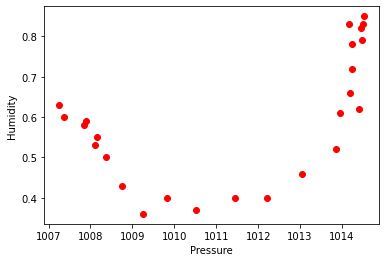

In [90]:
plt.scatter(X,y, c="red")
plt.xlabel("Pressure")
plt.ylabel("Humidity")
plt.show()

<h2>Performing Linear Regression on the data</h2>

In [91]:
linear_model = LinearRegression()
linear_model.fit(X,y)
y_pred_lin = linear_model.predict(X)

<h2>Let's visualize the fit made by our Linear Regression model</h2>

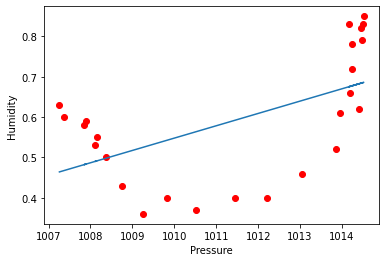

In [92]:
plt.scatter(X,y, c="red")
plt.xlabel("Pressure")
plt.ylabel("Humidity")
plt.plot(X, y_pred_lin)
plt.show()

<h2>Lets create a function to perform with desired degree Polynomial Regression</h2>

In [93]:
def polyReg(degree):
    # Changing the degree of the data from x to 1, x, x^2 ... x^degree 
    deg_change = PolynomialFeatures(degree=degree)
    X_poly = deg_change.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly,y)
    
    y_pred = poly_model.predict(X_poly)
    return y_pred, poly_model  

<h2>Performing polynomial regression fit with varying degrees and plotting them</h2>

In [94]:
y_pred_2,_ = polyReg(2)
y_pred_3,_= polyReg(3)
y_pred_4,_ = polyReg(4)

<h2>We can observe from the following plots that the degree 3 fits more accurately to the data compared to degree 2. Degree 4 is identical to degree 3. Increasing the degree performs better fit to the training data but can cause overfitting.</h2>

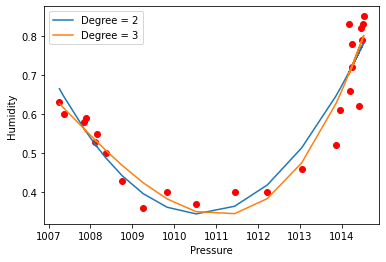

In [95]:
plt.scatter(X,y, c="red")
plt.xlabel("Pressure")
plt.ylabel("Humidity")
plt.plot(X, y_pred_2, label = 'Degree = 2')
plt.plot(X, y_pred_3, label = 'Degree = 3')
plt.legend()
plt.show()

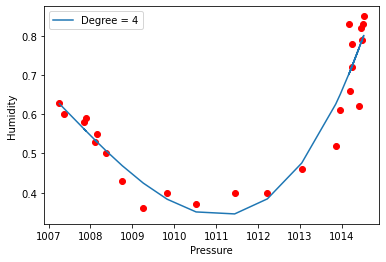

In [96]:
plt.scatter(X,y, c="red")
plt.xlabel("Pressure")
plt.ylabel("Humidity")
plt.plot(X, y_pred_4, label = 'Degree = 4')
plt.legend()
plt.show()

<h2>From the following observation we can see the r2 score increases with degree. 1.0 is regarded as the best r2 score, i.e. when predicted y values are exactly same as the original y values. Degree 3 and 4 have very similar r2 scores, which is also evident from the fitting plots in the above cells.</h2>

In [116]:
r2_score_lin = r2_score(y, y_pred_lin)
r2_score_poly2 = r2_score(y, y_pred_2)
r2_score_poly3 = r2_score(y, y_pred_3)
r2_score_poly4 = r2_score(y, y_pred_4)

print("===================== R2 SCORES =====================")
print("LINEAR REGRESSION       :                       {0:.3f} ".format(r2_score_lin) )
print("POLY REG (DEG 2)        :                       {0:.3f}".format(r2_score_poly2))
print("POLY REG (DEG 3)        :                       {0:.3f} ".format(r2_score_poly3))
print("POLY REG (DEG 4)        :                       {0:.3f} ".format(r2_score_poly4))

===================== R2 SCORES =====================
LINEAR REGRESSION       :                       0.305 
POLY REG (DEG 2)        :                       0.862
POLY REG (DEG 3)        :                       0.878 
POLY REG (DEG 4)        :                       0.878 


In [117]:
y_new_lin = linear_model.predict([[1007]])


_, poly_model = polyReg(2)
pre_process = PolynomialFeatures(degree=2)
y_new_deg2 = poly_model.predict(pre_process.fit_transform([[1007]]))


_, poly_model = polyReg(3)
pre_process = PolynomialFeatures(degree=3)
y_new_deg3 = poly_model.predict(pre_process.fit_transform([[1007]]))

print("For X = 1007")
print("Linear Regression predicts y val :", y_new_lin)
print("Polynomial Regression (deg = 2) predicts y val :", y_new_deg2)
print("Polynomial Regression (deg = 3) predicts y val :", y_new_deg3)


For X = 1007
Linear Regression predicts y val : [0.45617233]
Polynomial Regression (deg = 2) predicts y val : [0.7164631]
Polynomial Regression (deg = 3) predicts y val : [0.65532975]
